In [13]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno

In [14]:
filenames = ['LoanStats_2016Q3.csv','LoanStats_2016Q4.csv']
data = pd.DataFrame()
for i in filenames:
    datas = pd.read_csv(i,low_memory=False,skiprows=1)
    data = data.append(datas)


# Data Preprocessing

In [15]:
threshold = len(data)*0.4
data = data.dropna(thresh=threshold, axis=1 ) 

In [16]:
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) 

mths_since_last_delinq        0.461499
next_pymnt_d                  0.408171
il_util                       0.128761
mths_since_recent_inq         0.106326
emp_title                     0.064341
emp_length                    0.063172
num_tl_120dpd_2m              0.044906
title                         0.026817
mo_sin_old_il_acct            0.026116
mths_since_rcnt_il            0.026116
bc_util                       0.012552
percent_bc_gt_75              0.012168
bc_open_to_buy                0.012133
mths_since_recent_bc          0.011467
last_pymnt_d                  0.001234
revol_util                    0.000725
dti                           0.000178
all_util                      0.000079
last_credit_pull_d            0.000064
out_prncp                     0.000020
total_acc                     0.000020
initial_list_status           0.000020
debt_settlement_flag          0.000020
out_prncp_inv                 0.000020
total_pymnt                   0.000020
total_pymnt_inv          

In [17]:
data.to_csv('clean_data1.csv', index = False)

In [18]:
loans = pd.read_csv('clean_data1.csv') 
loans.dtypes.value_counts()

float64    78
object     25
dtype: int64

In [19]:
# remove those variable that only include one value since it is useless 
loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]

In [20]:
loans.shape

(202670, 102)

In [21]:
# describe numerical variable 
num_var = loans.select_dtypes(include=["int64",'float64'])
num_var.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,202666.000000,202666.000000,202666.000000,202666.000000,2.026660e+05,202634.000000,202666.000000,202666.000000,109138.000000,202666.000000,...,202666.000000,202666.000000,202666.000000,200204.00000,202666.000000,202666.000000,2.026660e+05,2.026660e+05,202666.000000,2.026660e+05
mean,14160.794238,14160.794238,14155.435455,433.235539,7.963788e+04,18.365964,0.372988,0.564229,33.444034,11.723437,...,0.099050,2.201356,93.280770,42.61459,0.150020,0.076481,1.764209e+05,5.199889e+04,21560.722553,4.518701e+04
std,9055.652198,9055.652198,9052.984155,276.302751,7.505528e+04,10.349536,0.972590,0.861746,21.820999,5.751638,...,0.564327,1.931416,9.662148,36.36730,0.404468,0.485746,1.812614e+05,5.048474e+04,21426.414980,4.569318e+04
min,1000.000000,1000.000000,950.000000,30.120000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00
25%,7000.000000,7000.000000,7000.000000,232.640000,4.800000e+04,12.190000,0.000000,0.000000,15.000000,8.000000,...,0.000000,1.000000,90.000000,0.00000,0.000000,0.000000,5.040000e+04,2.130700e+04,7900.000000,1.620000e+04
50%,12000.000000,12000.000000,12000.000000,358.200000,6.670000e+04,17.950000,0.000000,0.000000,30.000000,11.000000,...,0.000000,2.000000,96.900000,37.50000,0.000000,0.000000,1.116055e+05,3.839700e+04,15200.000000,3.399900e+04
75%,20000.000000,20000.000000,20000.000000,575.445000,9.500000e+04,24.250000,0.000000,1.000000,48.000000,15.000000,...,0.000000,3.000000,100.000000,71.40000,0.000000,0.000000,2.539958e+05,6.557975e+04,27900.000000,6.034300e+04
max,40000.000000,40000.000000,40000.000000,1584.900000,8.400000e+06,999.000000,29.000000,5.000000,195.000000,97.000000,...,29.000000,29.000000,100.000000,100.00000,8.000000,61.000000,9.999999e+06,1.548128e+06,719500.000000,2.000000e+06


In [22]:
# describe object type variable
object_var = loans.select_dtypes(include=['object'])
object_var.describe()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
count,202666,202666,202666,202666,189630,189867,202666,202666,202666,202666,...,202666,202523,202666,202420,119946,202657,202666,202666,202666,202666
unique,2,70,7,35,66684,11,4,3,6,7,...,636,1119,2,25,2,26,2,2,2,2
top,36 months,11.49%,C,B5,Teacher,10+ years,MORTGAGE,Source Verified,Aug-2016,Current,...,Aug-2003,0%,w,Jun-2018,Jul-2018,Jun-2018,Individual,N,Cash,N
freq,152838,16505,67990,16511,3803,70200,97530,84623,36280,113173,...,1582,833,146213,78805,83890,146602,198013,202541,202590,200543


In [23]:
# remove all the symbol in these variable and convert it to float
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')

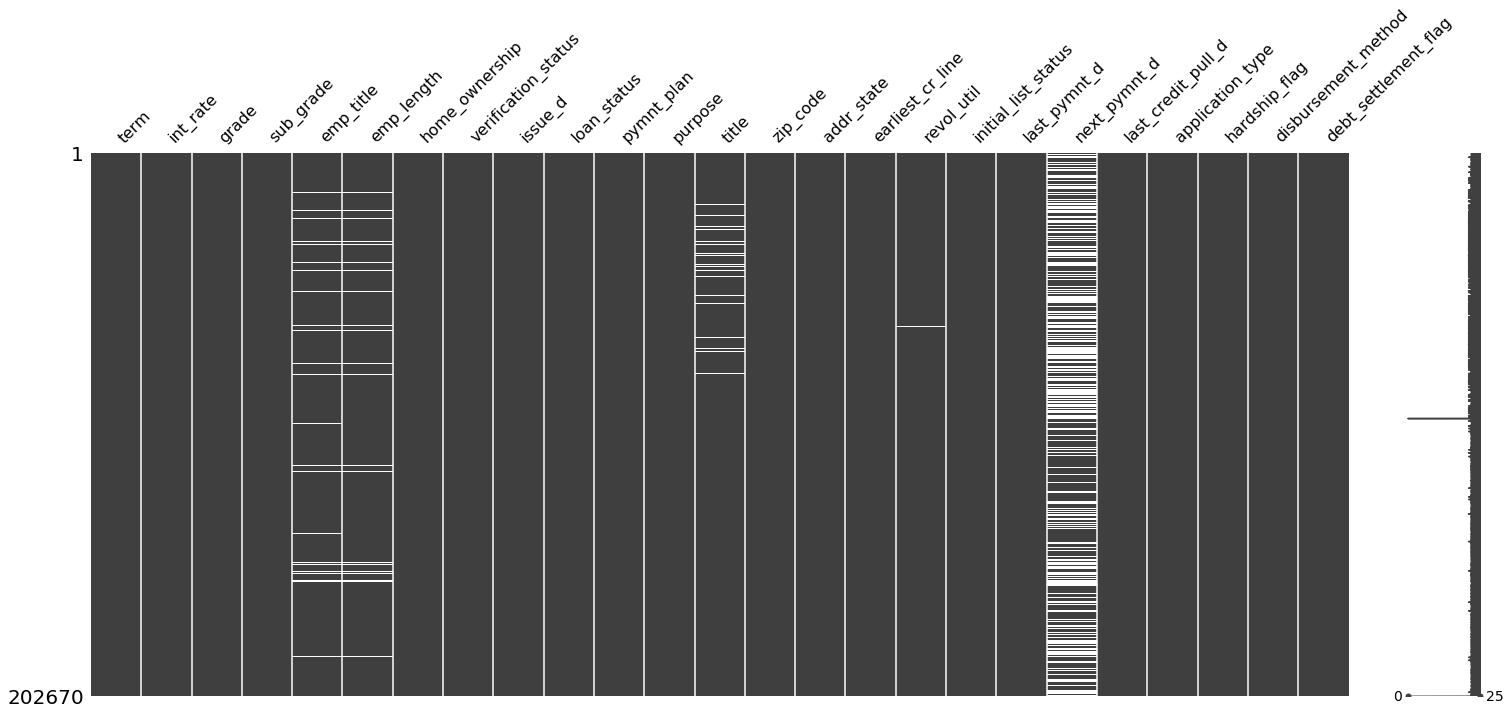

In [24]:
# visualise object type variables' missing values
msno.matrix(loans[object_var.columns])

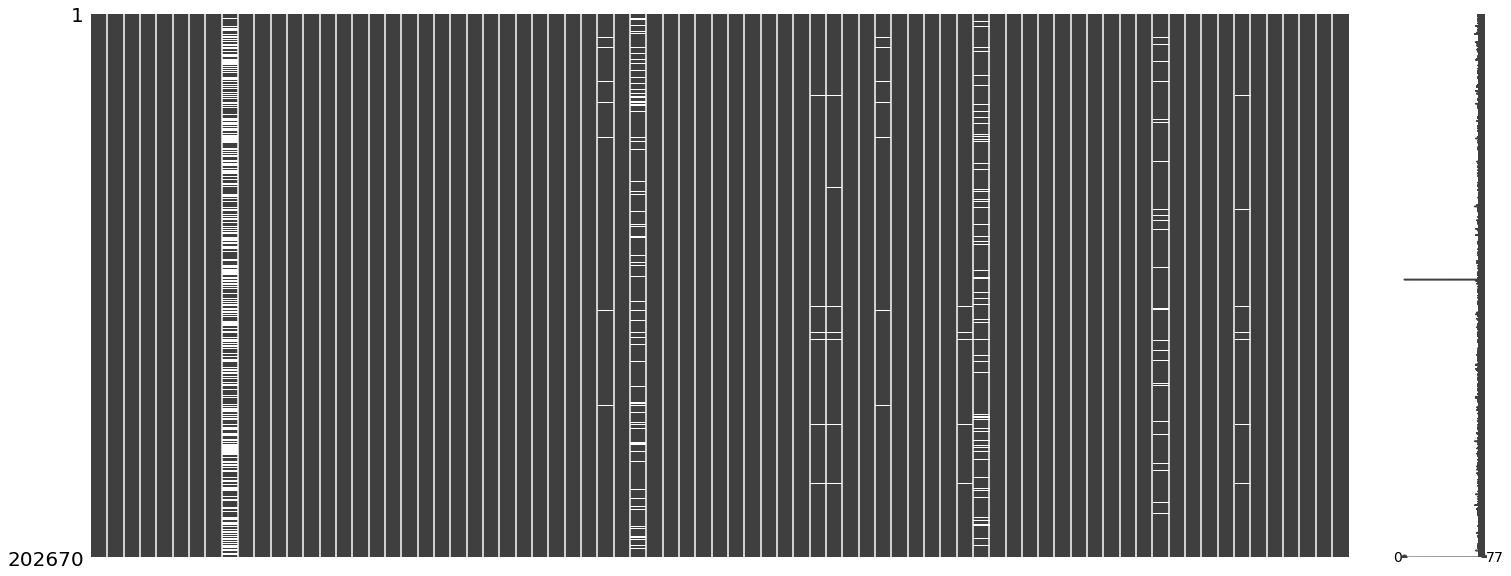

In [25]:
# visualise numerical variables' missing values
msno.matrix(loans[num_var.columns]) 

In [26]:
# replace those nan values with 'Unknown'
object_var = loans.select_dtypes(include=["object"]).columns 
loans[object_var] = loans[object_var].fillna("Unknown") 

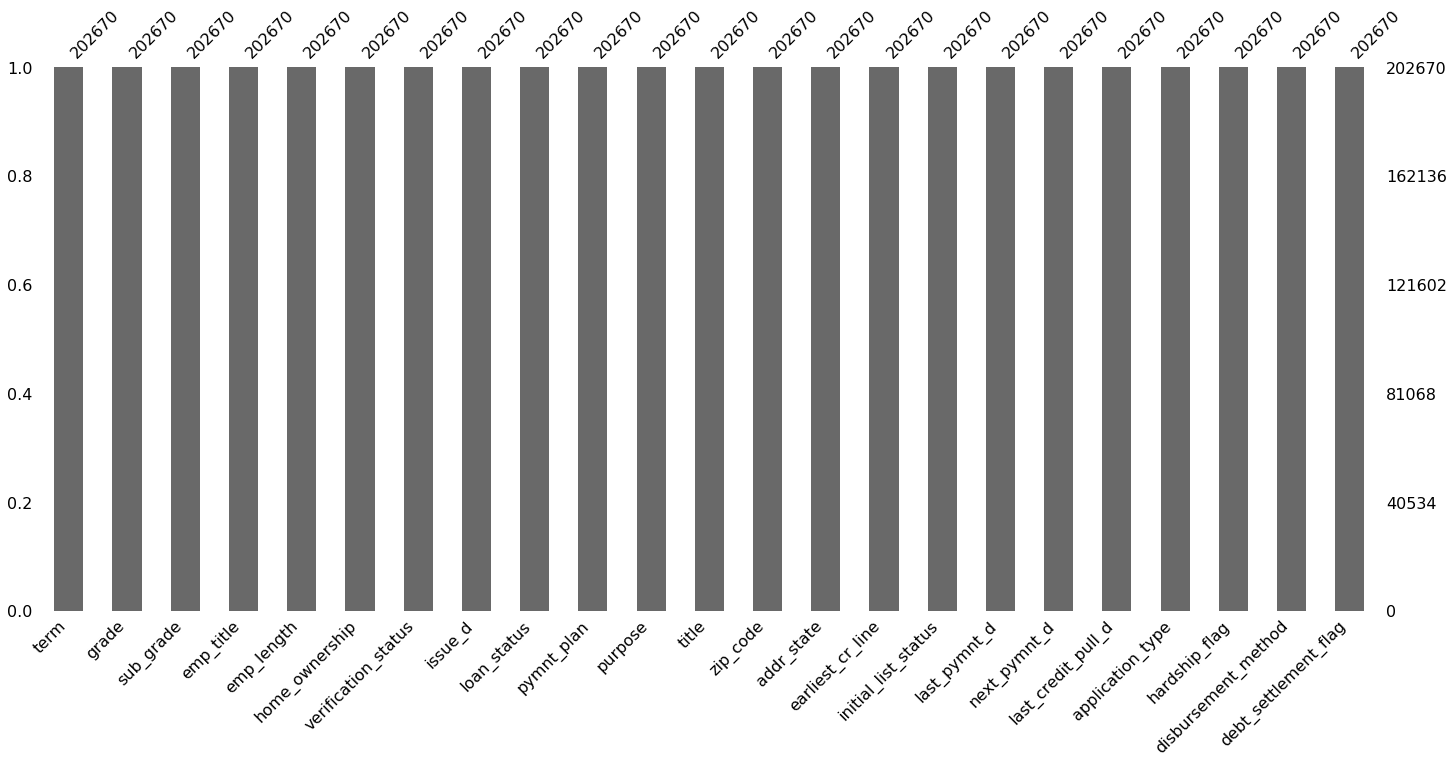

In [27]:
# check again if there is any missing values in object type variables
msno.bar(loans[object_var]) 

In [28]:
#find out the row that has over 65 missing values 
mngless_data_row = loans[loans.select_dtypes(include=[np.number]).isnull().sum(axis=1).sort_values(ascending=False) >= 65]
mngless_data_row.index

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Int64Index([99120, 99121, 202668, 202669], dtype='int64')

In [29]:
# drop the high missing values row
loans.drop([99120, 99121, 202668, 202669], inplace = True)

In [30]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(loans[num_var.columns])
loans[num_var.columns] = imr.transform(loans[num_var.columns])

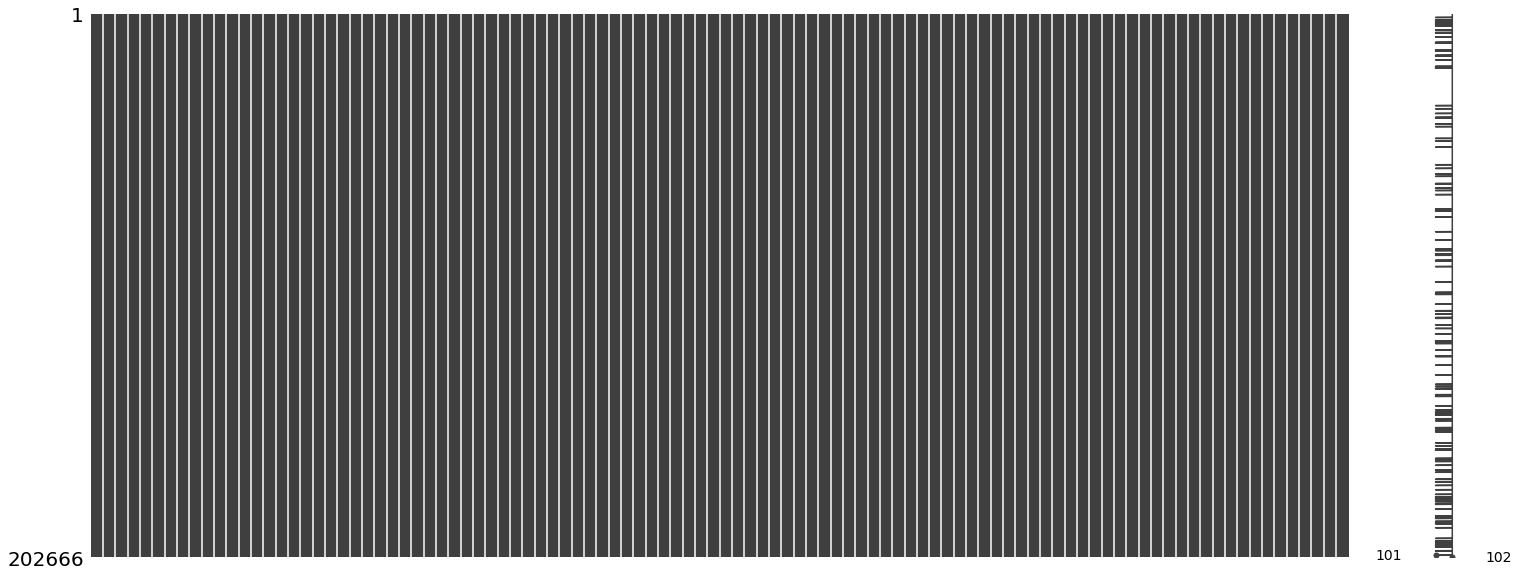

In [31]:
# check again if there is any missing values in numerical variable
msno.matrix(loans) 

In [32]:
# drop those meaningless variables 
drop_list = ['sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state', 
             'mths_since_last_delinq' ,'initial_list_status','title','issue_d',
             'last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
             'collection_recovery_fee', 'earliest_cr_line', 'pymnt_plan',
             'hardship_flag','disbursement_method','debt_settlement_flag','revol_util']

loans.drop(drop_list, axis=1, inplace = True)

In [33]:
loans.select_dtypes(include = ['object']).head()

,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,application_type
0,60 months,C,10+ years,MORTGAGE,Source Verified,Fully Paid,debt_consolidation,Individual
1,60 months,E,4 years,RENT,Not Verified,Current,debt_consolidation,Individual
2,36 months,B,2 years,RENT,Source Verified,Fully Paid,debt_consolidation,Individual
3,36 months,C,2 years,RENT,Not Verified,Fully Paid,debt_consolidation,Individual
4,60 months,C,10+ years,RENT,Not Verified,Charged Off,debt_consolidation,Individual


# Feature engineering

In [34]:
# create a new variable based on existing variables
loans['install_income'] = loans['installment'] / (loans['annual_inc'] / 12)

In [35]:
# Convert loan status into binary variable (0 - normal/fully paid, 1 - default)

mapping_dict ={'Current':0,
               'Fully Paid':0,
               'In Grace Period':1,
               'Late (31-120 days)':1,
               'Late (16-30 days)':1,
               'Charged Off':1, 
               'Default':1}

loans['loan_status'] = loans['loan_status'].replace(mapping_dict)

print( '\nAfter convert into binary:')

loans["loan_status"].value_counts()


After convert into binary:


0    175907
1     26759
Name: loan_status, dtype: int64

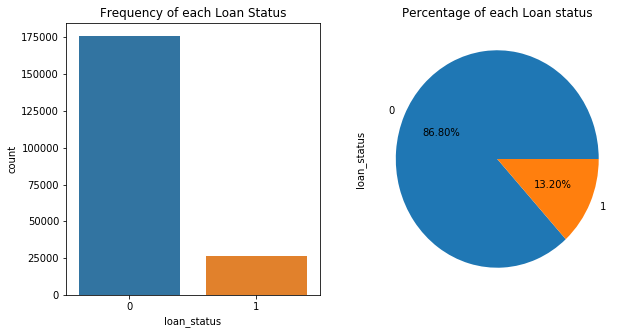

In [36]:
# visualise the loan status 
fig, axs = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='loan_status',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

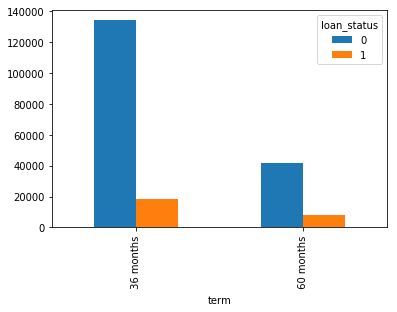

In [37]:
loans.groupby(['term','loan_status']).size().unstack().plot(kind='bar', stacked=False)

In [38]:
# convert emp_length and grade into ordinal variable 

mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "Unknown": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans = loans.replace(mapping_dict) 
loans[['emp_length','grade']].head()

,emp_length,grade
0,10,3
1,4,5
2,2,2
3,2,3
4,10,3


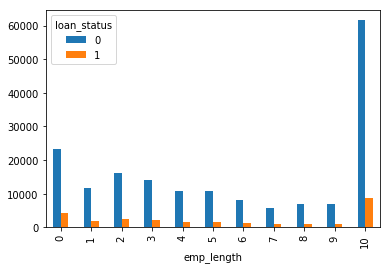

In [39]:
loans.groupby(['emp_length', 'loan_status']).size().unstack().plot(kind='bar', stacked=False)

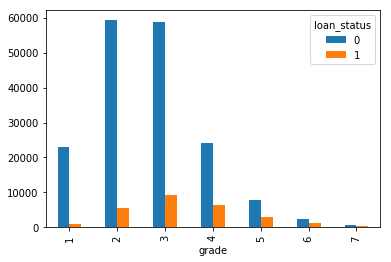

In [40]:
loans.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', stacked=False)

In [41]:
# One hot Encoding, convert those variables to dummy variable
n_columns = ["home_ownership", "verification_status", "application_type","purpose", "term"] 
dummy_df = pd.get_dummies(loans[n_columns])
loans = pd.concat([loans, dummy_df], axis=1)

In [42]:
# take a look at variables that contain home ownership after converting it 
loans.loc[:,loans.columns.str.contains("home_ownership")].head()

,home_ownership,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,MORTGAGE,0,1,0,0
1,RENT,0,0,0,1
2,RENT,0,0,0,1
3,RENT,0,0,0,1
4,RENT,0,0,0,1


In [43]:
# drop those variables
loans = loans.drop(n_columns, axis=1) 

In [44]:
loans.select_dtypes(include=['int64','float64']).columns 

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_sinc

In [45]:
np.all(np.isfinite(loans.install_income))

False

In [46]:
loans[loans.install_income == np.inf]['install_income']

1577      inf
14996     inf
15556     inf
15802     inf
107103    inf
107461    inf
109209    inf
109273    inf
110094    inf
111939    inf
112939    inf
118533    inf
126828    inf
141716    inf
143283    inf
146010    inf
146774    inf
148183    inf
152917    inf
160737    inf
163022    inf
164217    inf
164324    inf
164454    inf
167921    inf
170379    inf
170897    inf
171989    inf
174759    inf
200268    inf
Name: install_income, dtype: float64

In [47]:
loans.install_income.replace(np.inf, 0,inplace=True)

In [48]:
np.all(np.isfinite(loans.install_income))

True

# Feature Scaling

In [49]:
col = loans.select_dtypes(include=['int64','float64']).columns
col = col.drop('loan_status') # remove dependent variable 
loans_final = loans

from sklearn.preprocessing import StandardScaler 
sc =StandardScaler() # initialise standard scaler 
loans_final[col] =sc.fit_transform(loans_final[col]) 
loans_final.head() #data after feature scaling

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,1.749100,1.749100,1.750208,0.061423,0.957881,0.191464,1.116324,0.391208,0,-0.205433,...,0,0,0,0,0,0,0,0,0,1
1,0.661379,0.661379,0.662166,2.298043,0.572144,1.910210,-0.430559,-0.421529,0,0.805323,...,0,0,0,0,0,0,0,0,0,1
2,1.749100,1.749100,1.750208,-0.548564,1.986176,-0.667909,-0.946186,0.004825,0,0.407205,...,0,0,0,0,0,0,0,0,1,0
3,0.092672,0.092672,0.093292,0.061423,0.287238,0.191464,-0.946186,-0.328264,0,0.523161,...,0,0,0,0,0,0,0,0,1,0
4,0.423958,0.423958,0.424675,0.163088,-0.035525,0.191464,1.116324,-0.061793,1,-0.957219,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [50]:
# construct independent and dependent variables 

x_feature = list(loans_final.columns)
x_feature.remove('loan_status')
x_var = loans_final[x_feature]
y_var = loans_final['loan_status']
len(x_feature) # check the number of features

102

In [51]:
names = loans_final.columns
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,random_state=42)
rf.fit(x_var, y_var)
names, rf.feature_importances_
for feature in zip(names, rf.feature_importances_):
    print(feature)

('loan_amnt', 0.03597427245099893)
('funded_amnt', 0.028110531119835434)
('funded_amnt_inv', 0.039651344665728935)
('int_rate', 0.0113714400286151)
('installment', 0.03870041897707653)
('grade', 0.009480734912818185)
('emp_length', 0.0025999739521340233)
('annual_inc', 0.006596336793175483)
('loan_status', 0.00654171203547037)
('dti', 0.0015464343855906533)
('delinq_2yrs', 0.001618754930852608)
('inq_last_6mths', 0.003075273782083148)
('open_acc', 0.0011583069564646213)
('pub_rec', 0.005920641677569433)
('revol_bal', 0.0043972088890355965)
('total_acc', 0.061048850564534365)
('out_prncp', 0.03688111622628779)
('out_prncp_inv', 0.07670283747497084)
('total_pymnt', 0.08120101878498241)
('total_pymnt_inv', 0.14084286057724904)
('total_rec_prncp', 0.026366658161192193)
('total_rec_int', 0.03092927073800682)
('total_rec_late_fee', 0.14578956501299303)
('recoveries', 0.0004747629815587162)
('collections_12_mths_ex_med', 0.0001652242231707269)
('acc_now_delinq', 0.0017897560982352793)
('tot_c

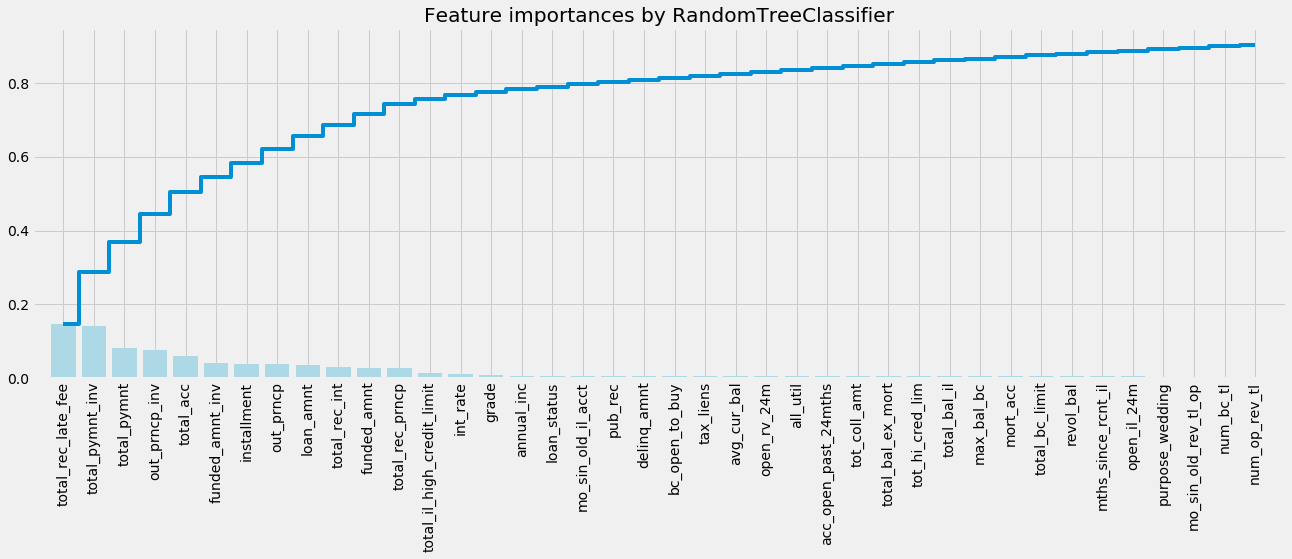

In [52]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

#feature importances visualisation
importances = rf.feature_importances_
feature_names = names
indices = np.argsort(importances)[::-1][:40]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Benchmark Model

In [53]:
TP = loans_final[loans_final['loan_status'] == 0].shape[0]
FP = loans_final.shape[0] - TP
TN = 0
FN = 0
accuracy = float(TP)/(TP+FP)
recall = float(TP)/(TP+FN)
precision = accuracy

fscore = (1+0.5**2)*(precision*recall)/(0.5**2*precision+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.8680, F-score: 0.8915]


In [54]:
feature_names = feature_names.drop('loan_status')

# SMOTE methods

In [55]:
# construct X and Y variable 
X = x_var[list(feature_names[indices][:20])]
y = y_var

total_sample = y.shape[0]
positive_sample = y[y == 0].shape[0]
negative_sample = y[y == 1].shape[0]
print('number of rows：{}; Normal:{:.2%}; Default:{:.2%}'.format(total_sample,
                                                                 positive_sample / total_sample,
                                                                 negative_sample / total_sample))
print('num of dimension:', X.shape[1])

number of rows：202666; Normal:86.80%; Default:13.20%
num of dimension: 20


In [56]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)   
X, y = sm.fit_sample(X, y)
total_sample = y.shape[0]
positive_sample = y[y == 0].shape[0]
negative_sample = y[y == 1].shape[0]
print('number of rows：{}; Normal:{:.2%}; Default:{:.2%}'.format(total_sample,
                                                                 positive_sample / total_sample,
                                                                 negative_sample / total_sample))

number of rows：351814; Normal:50.00%; Default:50.00%


# Model Evaluation Using Default Parameter

In [49]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

import datetime

print(datetime.datetime.now())

lr = LR() 
rf = RF()
lg = lgb.LGBMClassifier(silent=False)

#lr.fit(X_train,y_train)
#rf.fit(X_train,y_train)
#lg.fit(X_train,y_train)

print(datetime.datetime.now())

2018-10-04 23:03:40.674656
2018-10-04 23:03:40.683024


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [130]:
predicted_lr = lr.predict(X_test) 
predicted_rf = rf.predict(X_test)
predicted_lg = lg.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [131]:
from sklearn.metrics import accuracy_score
print("Test set accuracy score logistic regression: {:.5f}".format(accuracy_score(y_test,predicted_lr)))
print("Test set accuracy score random forest: {:.5f}".format(accuracy_score(y_test,predicted_rf)))
print("Test set accuracy score lightGBM: {:.5f}".format(accuracy_score(y_test,predicted_lg)))

Test set accuracy score logistic regression: 0.91257
Test set accuracy score random forest: 0.96116
Test set accuracy score lightGBM: 0.96886


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_lr))
print(classification_report(y_test, predicted_rf))
print(classification_report(y_test, predicted_lg))

             precision    recall  f1-score   support

          0       0.87      0.97      0.92     52812
          1       0.97      0.85      0.91     52733

avg / total       0.92      0.91      0.91    105545

             precision    recall  f1-score   support

          0       0.94      0.98      0.96     52812
          1       0.98      0.94      0.96     52733

avg / total       0.96      0.96      0.96    105545

             precision    recall  f1-score   support

          0       0.95      0.99      0.97     52812
          1       0.99      0.95      0.97     52733

avg / total       0.97      0.97      0.97    105545



In [153]:
from sklearn.metrics import roc_auc_score
lr_roc_auc = roc_auc_score(y_test, predicted_lr)
rf_roc_auc = roc_auc_score(y_test, predicted_rf)
lg_roc_auc = roc_auc_score(y_test, predicted_lg)

print("Area under the ROC curve logistic regression : %f" % lr_roc_auc)
print("Area under the ROC curve random forest : %f" % rf_roc_auc)
print("Area under the ROC curve lightGBM: %f" % lg_roc_auc)

Area under the ROC curve logistic regression : 0.912524
Area under the ROC curve random forest : 0.961148
Area under the ROC curve lightGBM: 0.968842


# Hyperparameter Tuning

In [73]:
# Cross validation and random grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cross_validation import train_test_split 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GB
import lightgbm as lgb
import datetime

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# param for logistic 
param_grid_lr = {'C': list(range(500,1000,5)),
                 'penalty': [ 'l1', 'l2']}

# param for random forest
param_grid_rf = {'n_estimators': list(range(1,100)),
                 'max_depth': list(range(1,100)),
                 'min_samples_leaf':list(range(1,10))}

# param for light GBM
param_grid_lg = {"max_depth": [25, 50, 75],
                 "learning_rate" : [0.01,0.05,0.1],
                 "num_leaves": [300,900,1200],
                 "n_estimators": [20]}
    
lr = LR()
rf = RF()
lg = lgb.LGBMClassifier()

# Randomized GridSearch #
lr_random = RandomizedSearchCV(estimator=lr, param_distributions = param_grid_lr, 
                                n_iter = 10, cv = 5, random_state = 42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions = param_grid_rf,
                               n_iter = 20, cv = 5, random_state = 42)

lg_random = RandomizedSearchCV(estimator=lg, param_distributions = param_grid_lg,
                                n_iter = 20, cv = 5, random_state = 42)


print(datetime.datetime.now())
lr_random.fit(X_train,y_train)
rf_random.fit(X_train,y_train)
lg_random.fit(X_train,y_train)
print(datetime.datetime.now())

2018-10-07 11:48:23.598642
2018-10-07 12:22:48.744886


In [114]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

crossvalidation = KFold(n=len(X),n_folds=5,shuffle=True, random_state=42)
scores_lr = cross_val_score(LR(penalty='l2',C=785), X, y,scoring='f1_weighted', cv=crossvalidation)
print('Folds: %i, f-score: %.2f std: %.5f' %(len(scores_lr),np.mean(np.abs(scores_lr)),np.std(scores_lr)))

Folds: 5, f-score: 0.91 std: 0.00067


In [115]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

crossvalidation = KFold(n=len(X),n_folds=5,shuffle=True, random_state=42)
scores_rf = cross_val_score(RF(n_estimators=39, min_samples_leaf=1,max_depth=68), X, y,scoring='f1_weighted', cv=crossvalidation)
print('Folds: %i, f-score: %.2f std: %.5f' %(len(scores_rf),np.mean(np.abs(scores_rf)),np.std(scores_rf)))

Folds: 5, f-score: 0.97 std: 0.00028


In [113]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

crossvalidation = KFold(n=len(X),n_folds=5,shuffle=True, random_state=42)
score_lightgbm = cross_val_score(lgb.LGBMClassifier(num_leaves=1200,n_estimators=20,max_depth=50,learning_rate=0.1), X, y,scoring='f1_weighted', cv=crossvalidation)
print('Folds: %i, f-score: %.2f std: %.5f' %(len(score_lightgbm),np.mean(np.abs(score_lightgbm)),np.std(score_lightgbm)))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Folds: 5, f-score: 0.97 std: 0.00041


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [105]:
print('Logistics Regression K-Fold cross validation score')
for i, score in enumerate(scores_lr,1):
    print("Fold %d f-score is %s" % (i, score))
print('f-score mean: %.2f std: %.5f' %(np.mean(np.abs(scores_lr)),np.std(scores_lr)))  

Logistics Regression K-Fold cross validation score
Fold 1 f-score is 0.9146727344032706
Fold 2 f-score is 0.9134507558877825
Fold 3 f-score is 0.9127326583219243
Fold 4 f-score is 0.9131105013952238
Fold 5 f-score is 0.9138691804779079
f-score mean: 0.91 std: 0.00067


In [111]:
print('Random Forest K-Fold cross validation score')
for i, score in enumerate(scores_rf,1):
    print("Fold %d f-score is %s" % (i, score))
print('f-score mean: %.2f std: %.5f' %(np.mean(np.abs(scores_rf)),np.std(scores_rf)))

Random Forest K-Fold cross validation score
Fold 1 f-score is 0.9712022487459698
Fold 2 f-score is 0.9712893644432696
Fold 3 f-score is 0.9708620305511655
Fold 4 f-score is 0.9701788349857251
Fold 5 f-score is 0.9705759971190822
f-score mean: 0.97 std: 0.00041


In [112]:
print('Light GBM K-Fold cross validation score')
for i, score in enumerate(score_lightgbm,1):
    print("Fold %d f-score is %s" % (i, score))
print('f-score mean: %.2f std: %.5f' %(np.mean(np.abs(score_lightgbm)),np.std(score_lightgbm)))
    

Light GBM K-Fold cross validation score
Fold 1 f-score is 0.9713143705130798
Fold 2 f-score is 0.970732850465982
Fold 3 f-score is 0.9714427385017876
Fold 4 f-score is 0.9719253508416972
Fold 5 f-score is 0.9717396365106301
f-score mean: 0.97 std: 0.00041


In [152]:
# print out the best parameter of randomized search 
best_random_lr = lr_random.best_params_
best_random_rf = rf_random.best_params_
best_random_lg = lg_random.best_params_

# print out the best parameter of Grid serach 
print('The best parameter of logistic regression:',best_random_lr)
print('The best parameter of random forest:',best_random_rf)
print('The best parameter of lightGBM:',best_random_lg)

The best parameter of logistic regression: {'penalty': 'l2', 'C': 785}
The best parameter of random forest: {'n_estimators': 39, 'min_samples_leaf': 1, 'max_depth': 68}
The best parameter of lightGBM: {'num_leaves': 1200, 'n_estimators': 20, 'max_depth': 50, 'learning_rate': 0.1}


# Final Results

In [124]:
pred_lr_random = lr_random.predict(X_test)
pred_rf_random = rf_random.predict(X_test)
pred_lg_random = lg_random.predict(X_test)

print("Test set accuracy score of Logistic Regression: {:.5f}".format(accuracy_score(pred_lr_random, y_test,)))
print("Test set accuracy score of Random Forest: {:.5f}".format(accuracy_score(pred_rf_random, y_test,)))
print("Test set accuracy score of lightGBM: {:.5f}".format(accuracy_score(pred_lg_random, y_test,)))

Test set accuracy score of Logistic Regression: 0.91365
Test set accuracy score of Random Forest: 0.96657
Test set accuracy score of lightGBM: 0.97173


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr_random))
print(classification_report(y_test, pred_rf_random))
print(classification_report(y_test, pred_lg_random))

             precision    recall  f1-score   support

          0       0.87      0.97      0.92     52812
          1       0.97      0.86      0.91     52733

avg / total       0.92      0.91      0.91    105545

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     52812
          1       0.98      0.95      0.97     52733

avg / total       0.97      0.97      0.97    105545

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     52812
          1       0.99      0.96      0.97     52733

avg / total       0.97      0.97      0.97    105545



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, pred_lg_random)
auc = roc_auc_score(y_test, pred_lg_random)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve lightGBM')
plt.legend(loc="lower right")
plt.show()